# <ins>Análise de Resultados</ins>

In [35]:
import pandas as pd
import numpy as np
import psycopg2 as psql
import matplotlib.pyplot as plt
from IPython.display import display

## Conectando ao banco de dados

In [36]:
conn = psql.connect(
    host='localhost',
    database='algoritmos',
    user='postgres',
    password='ypghck52'
)

cur = conn.cursor()

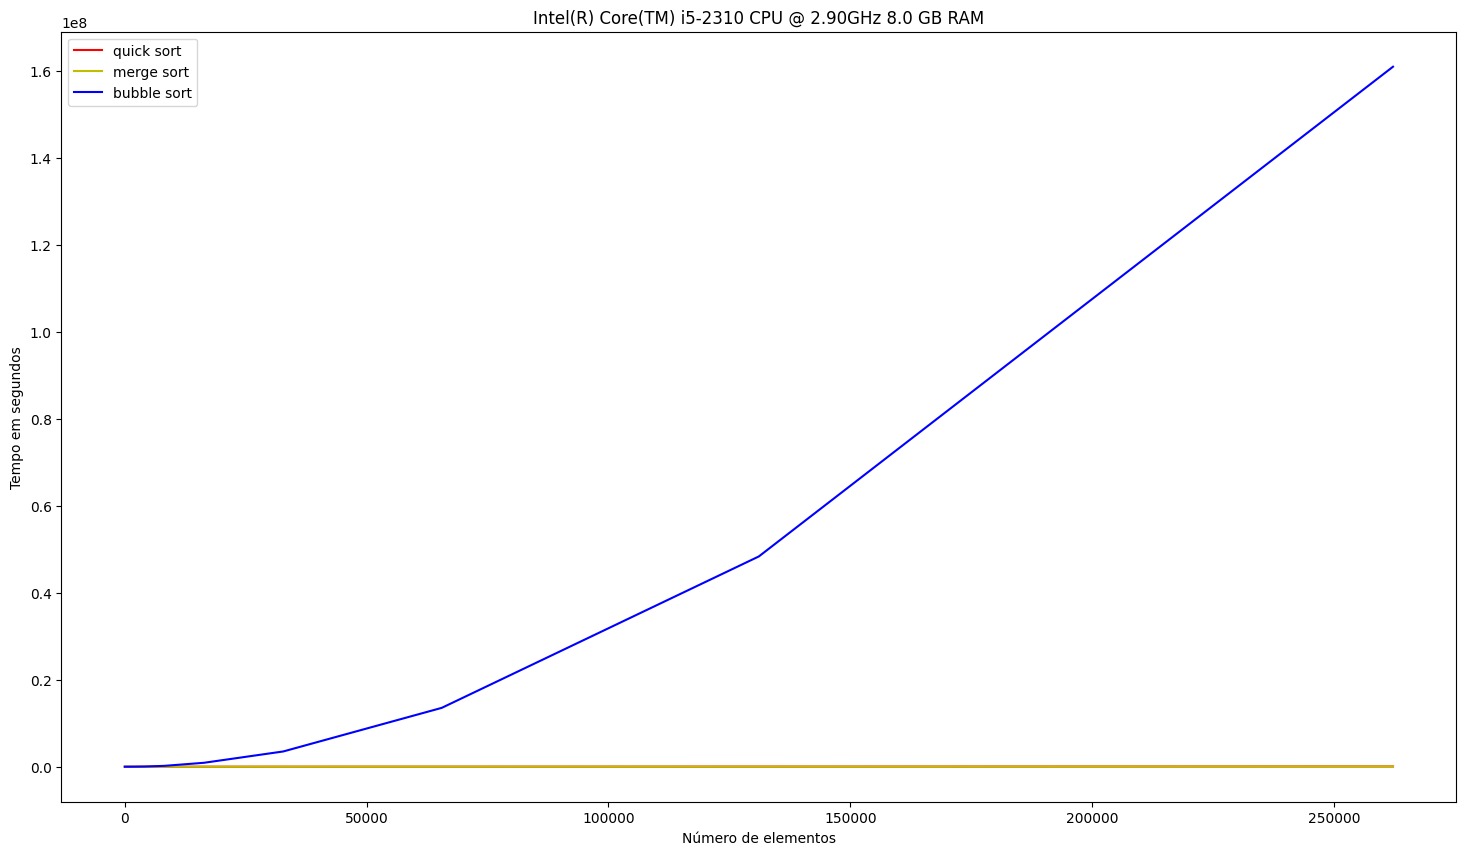

In [37]:
cur.execute('SELECT cpu, ram FROM hardware WHERE id = 1')
cpu, ram = cur.fetchone()
cur.execute('SELECT * FROM bubble(1) WHERE size > 16')

bubble_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
bubble_results = bubble_results.drop(['hardware_id'], axis=1)
bubble_results['avg'] = bubble_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1) 

cur.execute('SELECT * FROM merge(1) WHERE size > 16')
merge_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
merge_results = merge_results.drop(['hardware_id'], axis=1)
merge_results['avg'] = merge_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1) 

cur.execute('SELECT * FROM quick(1) WHERE size > 16')
quick_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
quick_results = quick_results.drop(['hardware_id'], axis=1)
quick_results['avg'] = quick_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1)

plt.figure(figsize=(18,10))
plt.plot(quick_results['size'].tolist(), quick_results['avg'].tolist(), 'r', label='quick sort')
plt.plot(merge_results['size'].tolist(), merge_results['avg'].tolist(), 'y', label='merge sort')
plt.plot(bubble_results['size'].tolist(), bubble_results['avg'].tolist(), 'b', label='bubble sort')
plt.xlabel('Número de elementos')
plt.ylabel('Tempo em segundos')
plt.title(f'{cpu} {str(ram)} GB RAM')
plt.legend()
plt.show()

## Lembrando:

* merge Sort: $O(n^2)$
* merge Sort: $O(n*log(n))$ - em média
* merge Sort: $O(n*log(n))$ - para os piores casos

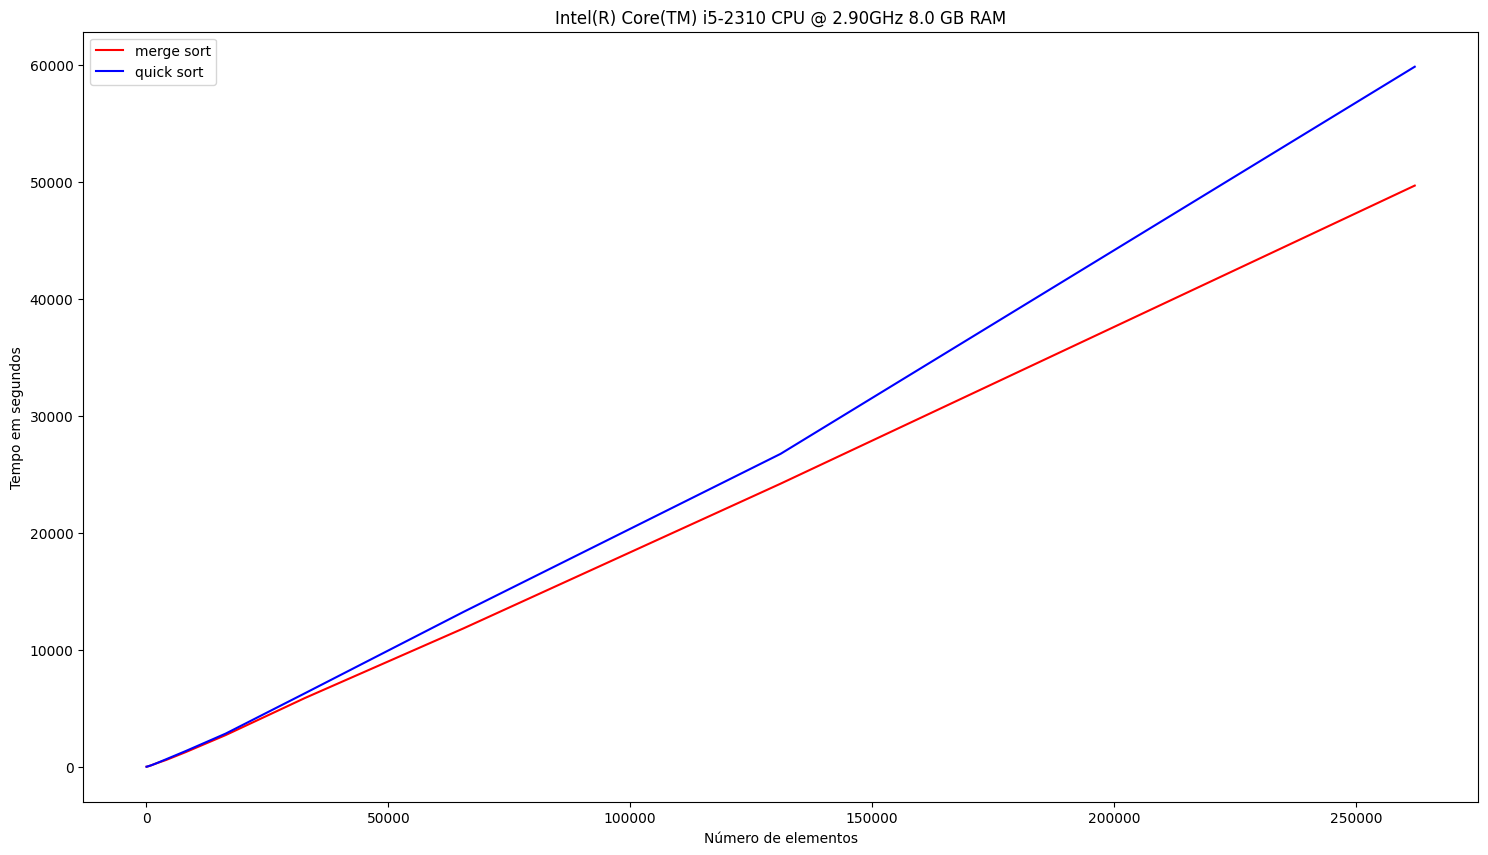

In [38]:
plt.figure(figsize=(18,10))
plt.plot(merge_results['size'].tolist(), merge_results['avg'].tolist(), 'r', label='merge sort')
plt.plot(quick_results['size'].tolist(), quick_results['avg'].tolist(), 'b', label='quick sort')
plt.xlabel('Número de elementos')
plt.ylabel('Tempo em segundos')
plt.title(f'{cpu} {str(ram)} GB RAM')
plt.legend()
plt.show()

## Podemos ver claramente que o merge Sort começa a tender para um comportamento $O(n^2)$. O merge Sort acaba sendo a melhor opção.

## Agora, calculando os intervalos de confiança e seus respectivos valores relativos (porcentagem da média), e plotando no gráfico.

,size,avg,intervalo_conf,porc_conf
0,32,2.20,0.96,43.65
1,64,5.20,1.44,27.70
2,128,11.20,1.90,16.97
3,256,24.80,2.93,11.83
4,512,58.20,8.26,14.18
5,1024,125.40,8.31,6.62
6,2048,289.80,42.16,14.55
7,4096,582.40,16.24,2.79
8,8192,1262.80,11.25,0.89
9,16384,2708.00,49.10,1.81


,size,avg,intervalo_conf,porc_conf
0,32,1.80,0.73,40.74
1,64,3.00,1.52,50.61
2,128,6.00,1.75,29.22
3,256,16.20,2.09,12.92
4,512,38.80,2.93,7.56
5,1024,87.80,4.08,4.65
6,2048,194.60,7.81,4.01
7,4096,418.20,4.70,1.12
8,8192,965.00,74.70,7.74
9,16384,1950.80,22.69,1.16


,size,avg,intervalo_conf,porc_conf
0,32,3.20,0.96,30.01
1,64,9.80,3.42,34.87
2,128,10.60,2.74,25.89
3,256,22.60,4.37,19.31
4,512,41.40,3.14,7.57
5,1024,87.00,9.80,11.26
6,2048,249.00,49.60,19.92
7,4096,393.00,9.88,2.51
8,8192,856.40,5.90,0.69
9,16384,1843.00,21.57,1.17


,size,avg,intervalo_conf,porc_conf
0,32,2.00,1.52,75.91
1,64,4.60,1.82,39.51
2,128,11.00,2.97,27.02
3,256,152.60,218.98,143.50
4,512,55.20,2.27,4.11
5,1024,117.00,7.62,6.51
6,2048,255.00,13.90,5.45
7,4096,572.40,12.09,2.11
8,8192,1191.20,32.49,2.73
9,16384,2538.80,20.08,0.79


,size,avg,intervalo_conf,porc_conf
0,32,0.80,0.73,91.67
1,64,1.80,0.73,40.74
2,128,3.40,1.33,39.10
3,256,6.80,2.18,32.10
4,512,16.00,4.16,25.99
5,1024,35.20,8.75,24.86
6,2048,81.60,19.41,23.79
7,4096,209.60,14.38,6.86
8,8192,505.40,8.76,1.73
9,16384,1079.40,15.88,1.47


,size,avg,intervalo_conf,porc_conf
0,32,1.20,0.96,80.02
1,64,2.00,0.62,30.99
2,128,4.20,1.57,37.33
3,256,10.40,5.24,50.43
4,512,20.20,5.27,26.11
5,1024,60.00,8.48,14.13
6,2048,188.20,96.75,51.41
7,4096,298.40,8.33,2.79
8,8192,678.40,3.01,0.44
9,16384,1590.60,134.69,8.47


,size,avg,intervalo_conf,porc_conf
0,32,1.40,0.78,56.00
1,64,2.80,1.14,40.82
2,128,7.40,1.82,24.56
3,256,14.00,2.63,18.78
4,512,32.20,4.40,13.67
5,1024,77.20,4.36,5.64
6,2048,176.00,5.47,3.11
7,4096,382.20,6.39,1.67
8,8192,848.00,18.78,2.21
9,16384,1743.20,92.12,5.28


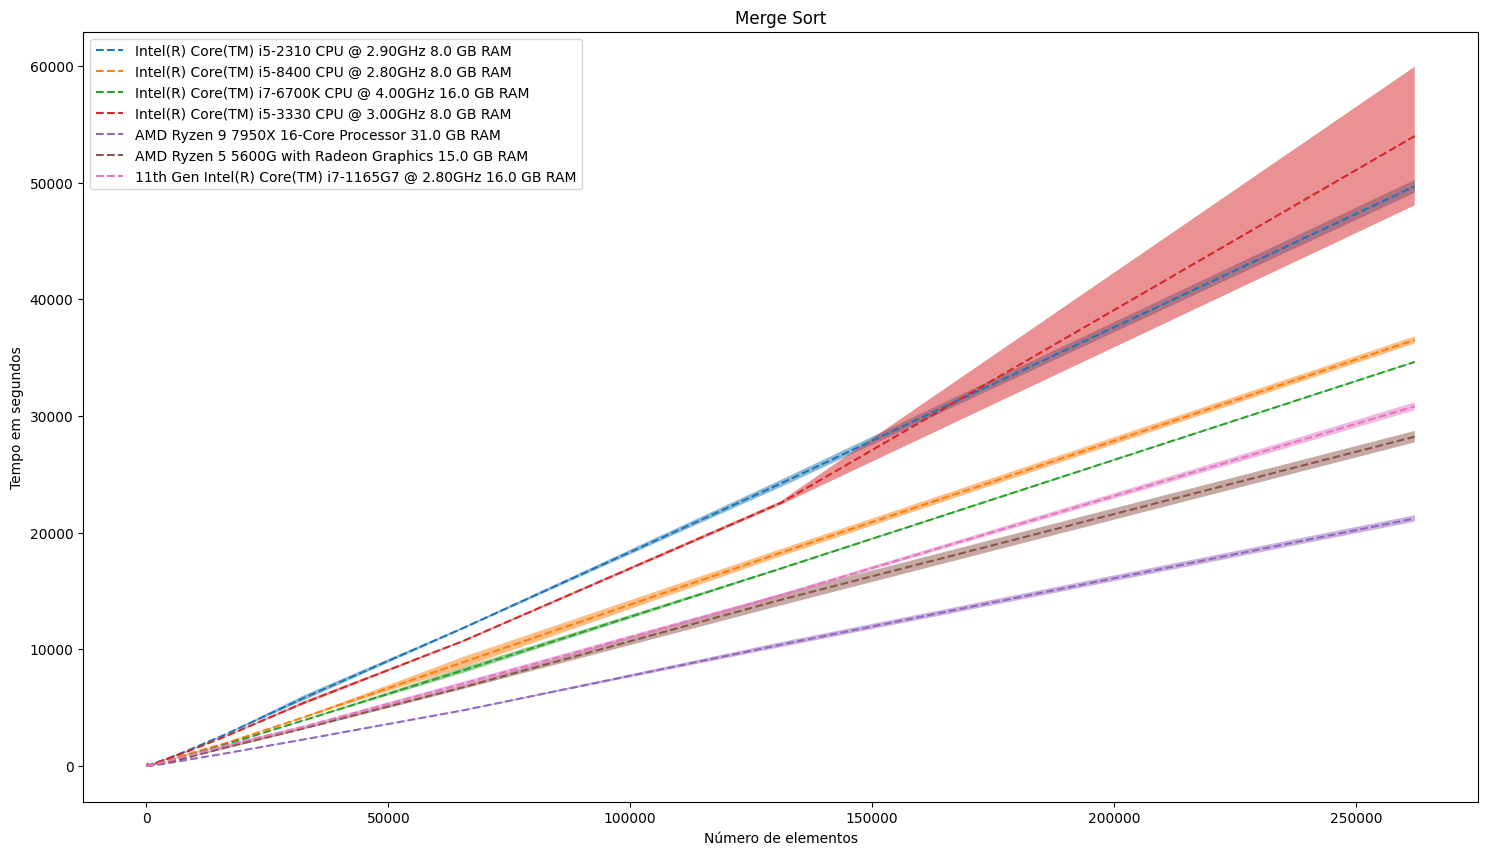

In [39]:
pd.options.display.float_format = '{:.2f}'.format
cur.execute('SELECT cpu, ram FROM hardware')
plt.figure(figsize=(18,10))
for cpu, ram in cur.fetchall():
    cur.execute(f"SELECT id FROM hardware WHERE cpu='{cpu}' AND ram={ram}")
    hardware_id = cur.fetchone()[0]
    cur.execute(f'SELECT * FROM merge({hardware_id}) WHERE size > 16')
    merge_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
    merge_results['avg'] = merge_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1) 
    merge_results['desv_pad'] = merge_results[['time1', 'time2', 'time3' , 'time4', 'time5']].std(axis=1, ddof=1) 
    merge_results['intervalo_conf'] = 1.96*(merge_results['desv_pad']/np.sqrt(5))
    merge_results['porc_conf'] = merge_results['intervalo_conf']*100/merge_results['avg']
    # display(merge_results)
    plt.plot(merge_results['size'].tolist(), merge_results['avg'].tolist(), '--', label=f'{cpu} {ram} GB RAM')
    plt.fill_between(merge_results['size'].tolist(), (merge_results['avg'] - merge_results['intervalo_conf']).tolist(), (merge_results['avg'] + merge_results['intervalo_conf']).tolist(), alpha=0.5)
    plt.title('Merge Sort')
    display(merge_results[['size', 'avg', 'intervalo_conf', 'porc_conf']])
    
plt.xlabel('Número de elementos')
plt.ylabel('Tempo em segundos')
plt.legend()
# plt.xlim([0,8000])
# plt.ylim([0,2000])
plt.show()

## Podemos ver as diferenças de tempo de execução em cada tipo de hardware.

,size,avg,intervalo_conf,porc_conf
0,32,2.20,0.39,17.82
1,64,4.20,1.14,27.21
2,128,10.80,0.96,8.89
3,256,27.00,1.39,5.13
4,512,57.60,1.33,2.31
5,1024,129.60,1.47,1.13
6,2048,292.80,2.66,0.91
7,4096,644.20,21.55,3.34
8,8192,1354.00,21.37,1.58
9,16384,2833.80,13.11,0.46


,size,avg,intervalo_conf,porc_conf
0,32,1.20,0.39,32.67
1,64,2.60,0.78,30.15
2,128,5.40,1.71,31.64
3,256,14.00,2.23,15.96
4,512,35.40,2.37,6.69
5,1024,91.60,9.63,10.52
6,2048,186.60,2.81,1.51
7,4096,421.40,11.93,2.83
8,8192,949.40,50.01,5.27
9,16384,2013.20,13.39,0.66


,size,avg,intervalo_conf,porc_conf
0,32,1.20,0.39,32.67
1,64,3.80,0.73,19.30
2,128,6.60,1.00,15.14
3,256,15.80,0.96,6.08
4,512,35.00,1.39,3.96
5,1024,76.00,2.56,3.36
6,2048,253.20,56.51,22.32
7,4096,376.60,2.45,0.65
8,8192,815.60,8.28,1.02
9,16384,1750.20,5.96,0.34


,size,avg,intervalo_conf,porc_conf
0,32,1.80,0.73,40.74
1,64,3.40,1.00,29.39
2,128,8.20,3.12,38.09
3,256,20.60,1.82,8.82
4,512,51.00,0.88,1.72
5,1024,111.20,1.69,1.52
6,2048,240.20,2.51,1.04
7,4096,554.40,20.19,3.64
8,8192,1138.60,1.82,0.16
9,16384,2564.00,25.13,0.98


,size,avg,intervalo_conf,porc_conf
0,32,0.80,0.39,49.00
1,64,1.20,0.39,32.67
2,128,3.00,1.07,35.78
3,256,6.20,1.90,30.65
4,512,13.80,3.69,26.72
5,1024,28.80,8.39,29.14
6,2048,66.20,16.19,24.46
7,4096,180.00,18.12,10.07
8,8192,445.00,5.98,1.34
9,16384,977.00,15.23,1.56


,size,avg,intervalo_conf,porc_conf
0,32,0.80,0.39,49.00
1,64,1.60,0.78,49.00
2,128,3.00,1.52,50.61
3,256,6.80,2.66,39.10
4,512,16.00,4.92,30.75
5,1024,47.40,8.51,17.96
6,2048,102.40,12.00,11.71
7,4096,256.40,31.22,12.17
8,8192,547.20,11.28,2.06
9,16384,1346.00,101.64,7.55


,size,avg,intervalo_conf,porc_conf
0,32,0.60,0.48,80.02
1,64,2.00,1.07,53.68
2,128,4.00,1.52,37.96
3,256,9.40,3.70,39.34
4,512,26.60,4.32,16.24
5,1024,71.60,5.49,7.67
6,2048,149.60,5.06,3.38
7,4096,337.60,5.49,1.63
8,8192,719.40,7.24,1.01
9,16384,1357.60,7.71,0.57


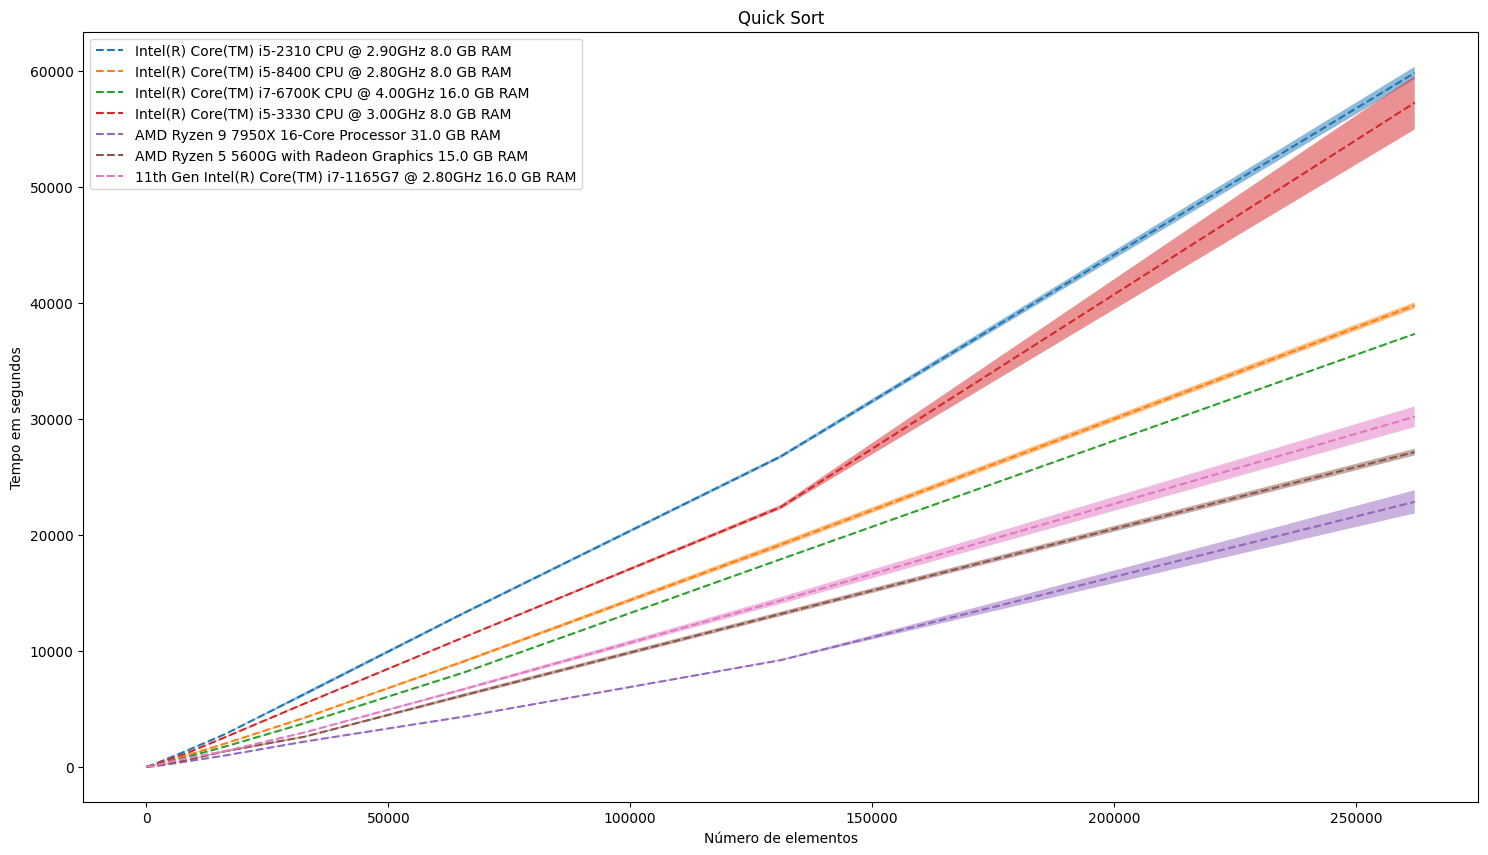

In [40]:
cur.execute('SELECT cpu, ram FROM hardware')
plt.figure(figsize=(18,10))
for cpu, ram in cur.fetchall():
    cur.execute(f"SELECT id FROM hardware WHERE cpu='{cpu}' AND ram={ram}")
    hardware_id = cur.fetchone()[0]
    cur.execute(f'SELECT * FROM quick({hardware_id}) WHERE size > 16')
    quick_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
    quick_results['avg'] = quick_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1) 
    quick_results['desv_pad'] = quick_results[['time1', 'time2', 'time3' , 'time4', 'time5']].std(axis=1, ddof=1) 
    quick_results['intervalo_conf'] = 1.96*(quick_results['desv_pad']/np.sqrt(5))
    quick_results['porc_conf'] = quick_results['intervalo_conf']*100/quick_results['avg']
    plt.plot(quick_results['size'].tolist(), quick_results['avg'].tolist(), '--', label=f'{cpu} {ram} GB RAM')
    plt.fill_between(quick_results['size'].tolist(), (quick_results['avg'] - quick_results['intervalo_conf']).tolist(), (quick_results['avg'] + quick_results['intervalo_conf']).tolist(), alpha=0.5)
    plt.title('Quick Sort')
    display(quick_results[['size', 'avg', 'intervalo_conf', 'porc_conf']])
    
plt.xlabel('Número de elementos')
plt.ylabel('Tempo em segundos')
plt.legend()
# plt.xlim([0,8000])
# plt.ylim([0,2000])
plt.show()

,size,avg,intervalo_conf,porc_conf
0,32,4.00,0.00,0.00
1,64,12.60,0.48,3.81
2,128,47.00,0.88,1.86
3,256,173.00,2.63,1.52
4,512,659.80,56.66,8.59
5,1024,2574.60,28.16,1.09
6,2048,10334.40,133.66,1.29
7,4096,43489.20,254.23,0.58
8,8192,200275.40,1235.74,0.62
9,16384,904533.20,67277.67,7.44


,size,avg,intervalo_conf,porc_conf
0,32,2.60,0.48,18.47
1,64,7.00,0.62,8.85
2,128,30.20,1.30,4.31
3,256,118.20,0.39,0.33
4,512,434.40,3.07,0.71
5,1024,1743.00,159.62,9.16
6,2048,7284.00,760.59,10.44
7,4096,32437.00,1596.99,4.92
8,8192,146692.20,988.40,0.67
9,16384,633130.20,8469.57,1.34


,size,avg,intervalo_conf,porc_conf
0,32,2.80,0.39,14.00
1,64,11.60,1.00,8.62
2,128,35.40,2.74,7.75
3,256,142.80,12.81,8.97
4,512,461.40,64.29,13.93
5,1024,1998.20,337.89,16.91
6,2048,8474.60,1110.17,13.10
7,4096,28815.00,683.54,2.37
8,8192,130253.20,259.19,0.20
9,16384,598253.40,10172.06,1.70


,size,avg,intervalo_conf,porc_conf
0,32,3.40,0.48,14.12
1,64,11.60,1.47,12.64
2,128,41.80,1.30,3.11
3,256,165.80,1.90,1.15
4,512,610.60,5.13,0.84
5,1024,2363.20,39.45,1.67
6,2048,9407.80,274.53,2.92
7,4096,40133.00,668.48,1.67
8,8192,191406.20,1770.20,0.92
9,16384,824419.60,10510.74,1.27


,size,avg,intervalo_conf,porc_conf
0,32,0.80,0.39,49.00
1,64,5.00,0.62,12.40
2,128,16.60,3.20,19.26
3,256,54.40,2.53,4.64
4,512,193.40,5.06,2.62
5,1024,793.20,8.62,1.09
6,2048,3084.40,73.79,2.39
7,4096,12093.00,330.16,2.73
8,8192,49898.60,1490.71,2.99
9,16384,189298.40,2302.84,1.22


,size,avg,intervalo_conf,porc_conf
0,32,1.80,0.39,21.78
1,64,7.60,1.18,15.47
2,128,19.20,1.14,5.95
3,256,74.80,19.40,25.93
4,512,273.40,39.65,14.50
5,1024,1050.80,5.79,0.55
6,2048,3817.80,93.09,2.44
7,4096,15679.80,761.68,4.86
8,8192,62065.20,2846.66,4.59
9,16384,284732.40,4329.22,1.52


,size,avg,intervalo_conf,porc_conf
0,32,2.20,0.39,17.82
1,64,8.60,1.47,17.05
2,128,25.40,2.67,10.52
3,256,100.60,1.82,1.81
4,512,383.00,2.84,0.74
5,1024,1538.00,65.97,4.29
6,2048,5705.20,43.64,0.76
7,4096,23395.40,1041.42,4.45
8,8192,82640.80,4473.74,5.41
9,16384,420642.60,7085.81,1.68


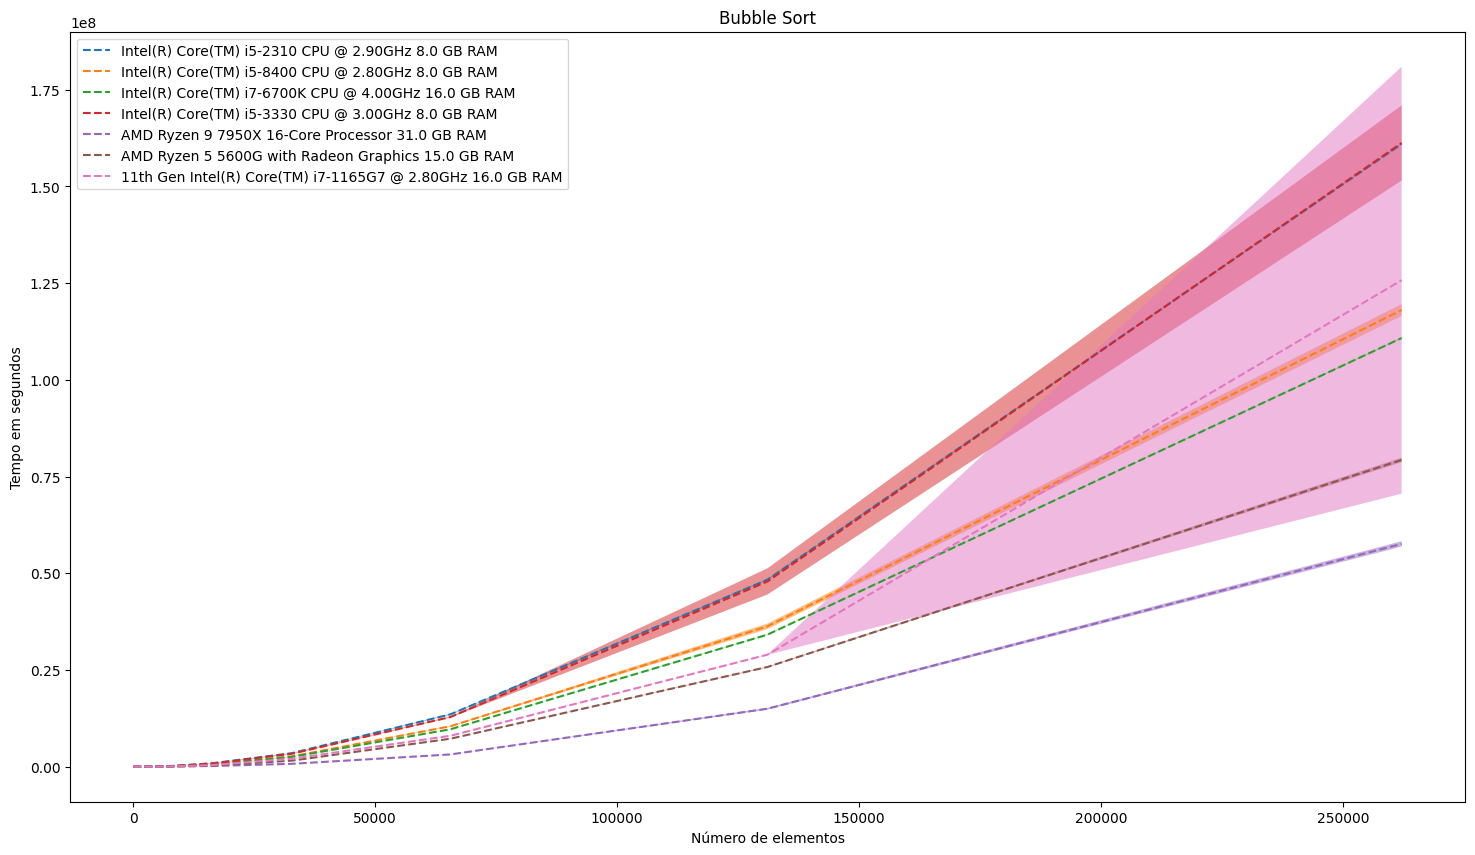

In [41]:
cur.execute('SELECT cpu, ram FROM hardware')
plt.figure(figsize=(18,10))
for cpu, ram in cur.fetchall():
    cur.execute(f"SELECT id FROM hardware WHERE cpu='{cpu}' AND ram={ram}")
    hardware_id = cur.fetchone()[0]
    cur.execute(f'SELECT * FROM bubble({hardware_id}) WHERE size > 16')
    bubble_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
    bubble_results['avg'] = bubble_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1) 
    bubble_results['desv_pad'] = bubble_results[['time1', 'time2', 'time3' , 'time4', 'time5']].std(axis=1, ddof=1)
    bubble_results['intervalo_conf'] = 1.96*(bubble_results['desv_pad']/np.sqrt(5))
    bubble_results['porc_conf'] = bubble_results['intervalo_conf']*100/bubble_results['avg']
    plt.plot(bubble_results['size'].tolist(), bubble_results['avg'].tolist(), '--', label=f'{cpu} {ram} GB RAM')
    plt.fill_between(bubble_results['size'].tolist(), (bubble_results['avg'] - bubble_results['intervalo_conf']).tolist(), (bubble_results['avg'] + bubble_results['intervalo_conf']).tolist(), alpha=0.5)
    plt.title('Bubble Sort')
    display(bubble_results[['size', 'avg', 'intervalo_conf', 'porc_conf']])
    
plt.xlabel('Número de elementos')
plt.ylabel('Tempo em segundos')
plt.legend()
# plt.xlim([0,8000])
# plt.ylim([0,200000])
plt.show()

## Teste de hipótese: As médias de tempo de execução são iguais para os três algoritmos quando há menos de 32 elementos
$$H_0: \mu_0 = \mu_1 = \mu_2 $$ 
para size = 32

In [42]:
cur.execute('SELECT cpu, ram FROM hardware')
for cpu, ram in cur.fetchall():
    cur.execute(f"SELECT id FROM hardware WHERE cpu='{cpu}' AND ram={ram}")
    hardware_id = cur.fetchone()[0]

    cur.execute(f'SELECT * FROM bubble({hardware_id}) WHERE size = 32')
    bubble_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
    bubble_results['avg'] = bubble_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1) 
    bubble_results['desv_pad'] = bubble_results[['time1', 'time2', 'time3' , 'time4', 'time5']].std(axis=1, ddof=1)

    cur.execute(f'SELECT * FROM quick({hardware_id}) WHERE size = 32')
    quick_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
    quick_results['avg'] = quick_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1) 
    quick_results['desv_pad'] = quick_results[['time1', 'time2', 'time3' , 'time4', 'time5']].std(axis=1, ddof=1)

    cur.execute(f'SELECT * FROM merge({hardware_id}) WHERE size = 32')
    merge_results = pd.DataFrame(cur.fetchall(), columns=[f'{cpu} {str(ram)} GB RAM', 'hardware_id', 'size', 'time1', 'time2', 'time3', 'time4', 'time5'])
    merge_results['avg'] = merge_results[['time1', 'time2', 'time3' , 'time4', 'time5']].mean(axis=1) 
    merge_results['desv_pad'] = merge_results[['time1', 'time2', 'time3' , 'time4', 'time5']].std(axis=1, ddof=1)

    df = pd.DataFrame([[bubble_results.iloc[0, 3:8].values.flatten().tolist()], [merge_results.iloc[0, 3:8].values.flatten().tolist()], [quick_results.iloc[0, 3:8].values.flatten().tolist()]], index=['Bubble Sort', 'Merge Sort', 'Quick Sort'], columns=['Amostra'])
    soma = pd.DataFrame([np.asarray(df['Amostra'][0]).sum(), np.asarray(df['Amostra'][1]).sum(), np.asarray(df['Amostra'][2]).sum()], index=['Bubble Sort', 'Merge Sort', 'Quick Sort'], columns=['Soma'])
    media = pd.DataFrame([np.asarray(df['Amostra'][0]).mean(), np.asarray(df['Amostra'][1]).mean(), np.asarray(df['Amostra'][2]).mean()], index=['Bubble Sort', 'Merge Sort', 'Quick Sort'], columns=['Média'])

    # SQT
    sqt = np.sum(np.power(df["Amostra"][0],2) + np.power(df["Amostra"][1],2) + np.power(df["Amostra"][2],2))
    sqt = sqt - np.power(np.sum(soma["Soma"]),2)/15

    # SQTr
    sqtr = np.sum(np.power(soma["Soma"],2))/5 - np.power(np.sum(soma["Soma"]),2)/15

    # SQE
    sqe = sqt - sqtr

    # QMTr
    qmtr = sqtr/2

    # QME
    qme = sqe/12

    # F
    f = qmtr/qme
    print(f"cpu: {cpu} ram: {ram} GB RAM f: {f:.2f}")
    display(df)

cpu: Intel(R) Core(TM) i5-2310 CPU @ 2.90GHz ram: 8.0 GB RAM f: 11.57


C:\Users\guisn\AppData\Local\Temp\ipykernel_6148\303123368.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  soma = pd.DataFrame([np.asarray(df['Amostra'][0]).sum(), np.asarray(df['Amostra'][1]).sum(), np.asarray(df['Amostra'][2]).sum()], index=['Bubble Sort', 'Merge Sort', 'Quick Sort'], columns=['Soma'])
C:\Users\guisn\AppData\Local\Temp\ipykernel_6148\303123368.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  media = pd.DataFrame([np.asarray(df['Amostra'][0]).mean(), np.asarray(df['Amostra'][1]).mean(), np.asarray(df['Amostra'][2]).mean()], index=['Bubble Sort', 'Merge Sort', 'Quick Sort'], columns=['Média'

,Amostra
Bubble Sort,"[4.0, 4.0, 4.0, 4.0, 4.0]"
Merge Sort,"[2.0, 1.0, 2.0, 2.0, 4.0]"
Quick Sort,"[2.0, 2.0, 2.0, 2.0, 3.0]"


cpu: Intel(R) Core(TM) i5-8400 CPU @ 2.80GHz ram: 8.0 GB RAM f: 6.17


C:\Users\guisn\AppData\Local\Temp\ipykernel_6148\303123368.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  soma = pd.DataFrame([np.asarray(df['Amostra'][0]).sum(), np.asarray(df['Amostra'][1]).sum(), np.asarray(df['Amostra'][2]).sum()], index=['Bubble Sort', 'Merge Sort', 'Quick Sort'], columns=['Soma'])
C:\Users\guisn\AppData\Local\Temp\ipykernel_6148\303123368.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  media = pd.DataFrame([np.asarray(df['Amostra'][0]).mean(), np.asarray(df['Amostra'][1]).mean(), np.asarray(df['Amostra'][2]).mean()], index=['Bubble Sort', 'Merge Sort', 'Quick Sort'], columns=['Média'

,Amostra
Bubble Sort,"[2.0, 2.0, 3.0, 3.0, 3.0]"
Merge Sort,"[1.0, 1.0, 2.0, 2.0, 3.0]"
Quick Sort,"[1.0, 1.0, 1.0, 1.0, 2.0]"


cpu: Intel(R) Core(TM) i7-6700K CPU @ 4.00GHz ram: 16.0 GB RAM f: 10.50


C:\Users\guisn\AppData\Local\Temp\ipykernel_6148\303123368.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  soma = pd.DataFrame([np.asarray(df['Amostra'][0]).sum(), np.asarray(df['Amostra'][1]).sum(), np.asarray(df['Amostra'][2]).sum()], index=['Bubble Sort', 'Merge Sort', 'Quick Sort'], columns=['Soma'])
C:\Users\guisn\AppData\Local\Temp\ipykernel_6148\303123368.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  media = pd.DataFrame([np.asarray(df['Amostra'][0]).mean(), np.asarray(df['Amostra'][1]).mean(), np.asarray(df['Amostra'][2]).mean()], index=['Bubble Sort', 'Merge Sort', 'Quick Sort'], columns=['Média'

,Amostra
Bubble Sort,"[2.0, 3.0, 3.0, 3.0, 3.0]"
Merge Sort,"[2.0, 3.0, 3.0, 3.0, 5.0]"
Quick Sort,"[1.0, 1.0, 1.0, 1.0, 2.0]"


cpu: Intel(R) Core(TM) i5-3330 CPU @ 3.00GHz ram: 8.0 GB RAM f: 2.85


C:\Users\guisn\AppData\Local\Temp\ipykernel_6148\303123368.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  soma = pd.DataFrame([np.asarray(df['Amostra'][0]).sum(), np.asarray(df['Amostra'][1]).sum(), np.asarray(df['Amostra'][2]).sum()], index=['Bubble Sort', 'Merge Sort', 'Quick Sort'], columns=['Soma'])
C:\Users\guisn\AppData\Local\Temp\ipykernel_6148\303123368.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  media = pd.DataFrame([np.asarray(df['Amostra'][0]).mean(), np.asarray(df['Amostra'][1]).mean(), np.asarray(df['Amostra'][2]).mean()], index=['Bubble Sort', 'Merge Sort', 'Quick Sort'], columns=['Média'

,Amostra
Bubble Sort,"[3.0, 3.0, 3.0, 4.0, 4.0]"
Merge Sort,"[1.0, 1.0, 1.0, 2.0, 5.0]"
Quick Sort,"[1.0, 1.0, 2.0, 2.0, 3.0]"


cpu: AMD Ryzen 9 7950X 16-Core Processor ram: 31.0 GB RAM f: 0.00


C:\Users\guisn\AppData\Local\Temp\ipykernel_6148\303123368.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  soma = pd.DataFrame([np.asarray(df['Amostra'][0]).sum(), np.asarray(df['Amostra'][1]).sum(), np.asarray(df['Amostra'][2]).sum()], index=['Bubble Sort', 'Merge Sort', 'Quick Sort'], columns=['Soma'])
C:\Users\guisn\AppData\Local\Temp\ipykernel_6148\303123368.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  media = pd.DataFrame([np.asarray(df['Amostra'][0]).mean(), np.asarray(df['Amostra'][1]).mean(), np.asarray(df['Amostra'][2]).mean()], index=['Bubble Sort', 'Merge Sort', 'Quick Sort'], columns=['Média'

,Amostra
Bubble Sort,"[0.0, 1.0, 1.0, 1.0, 1.0]"
Merge Sort,"[0.0, 0.0, 1.0, 1.0, 2.0]"
Quick Sort,"[1.0, 1.0, 0.0, 1.0, 1.0]"


cpu: AMD Ryzen 5 5600G with Radeon Graphics ram: 15.0 GB RAM f: 2.38


C:\Users\guisn\AppData\Local\Temp\ipykernel_6148\303123368.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  soma = pd.DataFrame([np.asarray(df['Amostra'][0]).sum(), np.asarray(df['Amostra'][1]).sum(), np.asarray(df['Amostra'][2]).sum()], index=['Bubble Sort', 'Merge Sort', 'Quick Sort'], columns=['Soma'])
C:\Users\guisn\AppData\Local\Temp\ipykernel_6148\303123368.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  media = pd.DataFrame([np.asarray(df['Amostra'][0]).mean(), np.asarray(df['Amostra'][1]).mean(), np.asarray(df['Amostra'][2]).mean()], index=['Bubble Sort', 'Merge Sort', 'Quick Sort'], columns=['Média'

,Amostra
Bubble Sort,"[2.0, 1.0, 2.0, 2.0, 2.0]"
Merge Sort,"[0.0, 1.0, 1.0, 1.0, 3.0]"
Quick Sort,"[0.0, 1.0, 1.0, 1.0, 1.0]"


C:\Users\guisn\AppData\Local\Temp\ipykernel_6148\303123368.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  soma = pd.DataFrame([np.asarray(df['Amostra'][0]).sum(), np.asarray(df['Amostra'][1]).sum(), np.asarray(df['Amostra'][2]).sum()], index=['Bubble Sort', 'Merge Sort', 'Quick Sort'], columns=['Soma'])


cpu: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz ram: 16.0 GB RAM f: 7.38


C:\Users\guisn\AppData\Local\Temp\ipykernel_6148\303123368.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  media = pd.DataFrame([np.asarray(df['Amostra'][0]).mean(), np.asarray(df['Amostra'][1]).mean(), np.asarray(df['Amostra'][2]).mean()], index=['Bubble Sort', 'Merge Sort', 'Quick Sort'], columns=['Média'])
C:\Users\guisn\AppData\Local\Temp\ipykernel_6148\303123368.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sqt = np.sum(np.power(df["Amostra"][0],2) + np.power(df["Amostra"][1],2) + np.power(df["Amostra"][2],2))


,Amostra
Bubble Sort,"[2.0, 3.0, 2.0, 2.0, 2.0]"
Merge Sort,"[1.0, 1.0, 1.0, 1.0, 3.0]"
Quick Sort,"[1.0, 0.0, 0.0, 1.0, 1.0]"


## $H_0$ é rejeitado para i7-6700k, i5-2310, i7-1165G7